# Final Exam - Math/Phys 248

**CRN:** 13763, 13764. Section A01. Fall term, 2019. 

Friday December 20th, 2pm--5pm, in BEC 160.

Store your final exam in your **mp248** repository, in the file **mp248/Exams/Final.Exam.ipynb**. 

Automated feedback will be provided in your CourseSpaces **Task 11**.

During the exam you are only allowed to communicate with the exam invigilators.   You are allowed to use your course notes, your course work, and citeable permanent webpages, such as the Python documentation and StackExchange sites.   Your work will be checked for plagarism, so be careful to cite any code you use that is not your own.  

----

**P1:** Write a Python function that takes as input a Sympy expression of two variables and creates the quiver plot of the gradient.  Call your function **gradQuiv(EXPR)**.  Have **EXPR** be Sympy expressions in the Sympy symbols **x** and **y**.  Your quiver plot should be over the domain 
$$-1 \leq x \leq 1 \hskip 1cm -1 \leq y \leq 1.$$
Load matplotlib in **inline** mode and include the output of
**gradQuiv($x^2+y^2$)** and **gradQuiv($x^2-y^2$)**.

In [30]:
import sympy as sp
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
f = sp.Function('f')
x = sp.Symbol('x')
y = sp.Symbol('y')

In [93]:
def gradQuiv(EXPR):
    '''
    Input: A function
    Output: A quiver plot of the function's gradient for x and y = [-1,1]
    '''
    x = np.arange(-1,1, 0.1)
    y = np.arange(-1,1, 0.1)
    X, Y = np.meshgrid(x, y) #domain
    F = EXPR
    dx, dy = np.gradient(F)
    plt.quiver(X, Y, dx, dy, angles = 'xy')

In [96]:
a, b = np.gradient(x**2 + y**2)

ValueError: not enough values to unpack (expected 3, got 0)

In [94]:
gradQuiv(x**2 + y**2)

ValueError: not enough values to unpack (expected 2, got 0)

In [80]:
gradQuiv(x**2 - y**2)

ValueError: not enough values to unpack (expected 2, got 0)

----

**P2:** Import the library **P2dat** in the **Exams** directory, using the Python **import** command.  You can copy the file to your personal repository, if you like.  In that library there is a variable called **DAT**.  It is a list of 2822 points in the plane.   Make a point plot from that data.  Scale the data appropriately.  **What does it say?** i.e. once you have created an appropriate point plot from the data, it will appear to be a sentence written in English. 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from P2dat import DAT

Text(0, 0.5, 'Y')

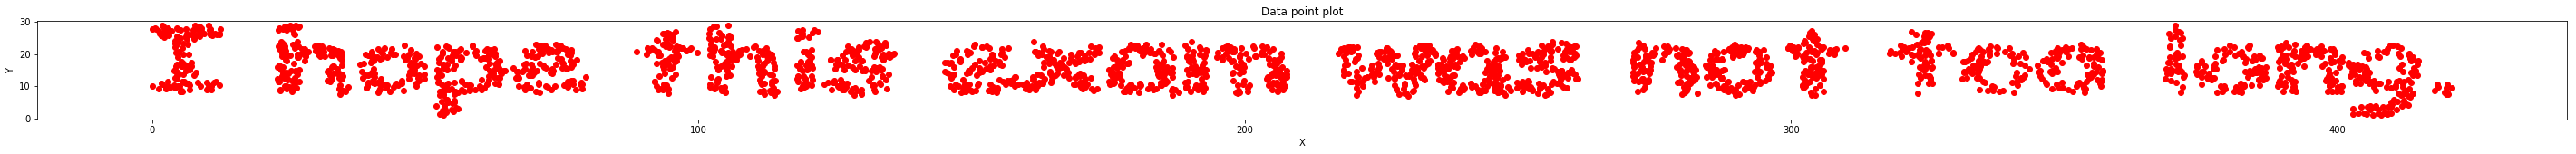

In [9]:
plt.figure(figsize= (50,2))
plt.plot([x[0] for x in DAT], [x[1] for x in DAT], 'ro')
plt.title("Data point plot")
plt.xlabel("X")
plt.ylabel("Y")

I hope this exam was not too long.

----

**P3:** The **fivethirtyeight.com** webpage has collected over three million tweets generated by Russian trolls at the **Internet Research Agency**.  In the codeblock below, roughly **10%** of those tweets are loaded into the **dat** variable. 

Print the twenty most commonly occuring words in the tweets, in the form of a list of pairs **('word', count)** where
**count** is the number of times that word occurs. Only consider words with 5 or more letters, and store the words in
their lower-case forms. 

For example, you should see **('would', 2706)** and **('\&amp;', 7463)** in your list.  i.e. consider your words to be the elements of the list **tweet.split(' ')**. 

Note, the **csv** file downloaded in the codeblock below is fairly large, so you will likely only want to do it once -- put the rest of your code in other codeblocks to avoid repeat execution.

In [2]:
import pandas as pd
import pprint as pp
import collections as co

In [3]:
dat = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/"
                  "russian-troll-tweets/master/IRAhandle_tweets_1.csv") 

In [4]:
#dat

In [5]:
dat['content']

0         "We have a sitting Democrat US Senator on tria...
1         Marshawn Lynch arrives to game in anti-Trump s...
2         Daughter of fallen Navy Sailor delivers powerf...
3         JUST IN: President Trump dedicates Presidents ...
4         19,000 RESPECTING our National Anthem! #StandF...
5         Dan Bongino: "Nobody trolls liberals better th...
6                               🐝🐝🐝 https://t.co/MorL3AQW0z
7         '@SenatorMenendez @CarmenYulinCruz Doesn't mat...
8         As much as I hate promoting CNN article, here ...
9         After the 'genocide' remark from San Juan Mayo...
10        After the 'genocide' remark from San Juan Mayo...
11        '@thehill Why won't she apologize to us for ly...
12        Sarah Sanders destroys NBC reporter: "Trump ma...
13        Hi @MichelleObama, remember when you said Wein...
14        Hi @MichelleObama, remember when you praised H...
15        Wow! Even CNN is slamming the Obamas for silen...
16        First lady Melania Trump visit

In [5]:
#dat['content'][0].split(' ')

In [6]:
#ctdict = co.defaultdict(int)
#word = [ c.split(" ") for c in dat["content"] ]
#word[0]
#for i in word:
#    word_dict = { w for w in i }
#word_dict

In [29]:
dat.iloc[0].to_dict()

{'external_author_id': 906000000000000000,
 'author': '10_GOP',
 'content': '"We have a sitting Democrat US Senator on trial for corruption and you\'ve barely heard a peep from the mainstream media." ~ @nedryun https://t.co/gh6g0D1oiC',
 'region': 'Unknown',
 'language': 'English',
 'publish_date': '10/1/2017 19:58',
 'harvested_date': '10/1/2017 19:59',
 'following': 1052,
 'followers': 9636,
 'updates': 253,
 'post_type': nan,
 'account_type': 'Right',
 'retweet': 0,
 'account_category': 'RightTroll',
 'new_june_2018': 0,
 'alt_external_id': 905874659358453760,
 'tweet_id': 914580356430536707,
 'article_url': 'http://twitter.com/905874659358453760/statuses/914580356430536707',
 'tco1_step1': 'https://twitter.com/10_gop/status/914580356430536707/video/1',
 'tco2_step1': nan,
 'tco3_step1': nan}

Convert upper to lower [reference](https://stackoverflow.com/questions/6797984/how-do-i-lowercase-a-string-in-python)

In [7]:
word_dict = {}
for i in range(len(dat)):
    d = dat.iloc[i].to_dict()
    ct_str = d['content'].split(" ") ## Split the content of tweet 
    for j in ct_str: ## Loop through every word of tweet
        if len(j) >= 5:
            if j.lower() not in word_dict:
                word_dict[j.lower()] = 1
            else:
                word_dict[j.lower()] += 1
        else:
            continue
word_dict
#filtered_dict = {}
#for k in word_dict.keys():
#    if len(k) >= 5:
#        filtered_dict[k] = word_dict[k]
#filtered_dict

{'sitting': 139,
 'democrat': 686,
 'senator': 550,
 'trial': 145,
 'corruption': 252,
 "you've": 240,
 'barely': 38,
 'heard': 326,
 'mainstream': 268,
 'media."': 5,
 '@nedryun': 1,
 'https://t.co/gh6g0d1oic': 1,
 'marshawn': 5,
 'lynch': 327,
 'arrives': 39,
 'anti-trump': 472,
 'shirt.': 10,
 'judging': 20,
 'sagging': 2,
 'pants': 92,
 'shirt': 95,
 'should': 2514,
 'https://t.co/mlh1i30lzz': 1,
 'daughter': 182,
 'fallen': 50,
 'sailor': 20,
 'delivers': 101,
 'powerful': 149,
 'monologue': 12,
 'anthem': 205,
 'protests,': 15,
 'burns': 98,
 'packers': 10,
 'gear.': 5,
 '#boycottnfl': 29,
 'https://t.co/qdlfbgmeag': 2,
 'president': 2874,
 'trump': 14829,
 'dedicates': 48,
 'presidents': 55,
 'tournament': 22,
 'trophy': 13,
 'people': 4792,
 'florida,': 21,
 'texas': 436,
 'puerto': 68,
 'rico.': 1,
 'https://t.co/z9wva4djae': 1,
 '19,000': 4,
 'respecting': 15,
 'national': 866,
 'anthem!': 13,
 '#standforouranthem🇺🇸': 1,
 'https://t.co/czutygamqv': 1,
 'bongino:': 3,
 '"nobod

In [12]:
## Sort the list by values and descending order, print the first 20 elements
sorted_word = sorted(word_dict.items(), key = lambda x: x[1])
sorted_word.reverse()
print(sorted_word[:20])

[('trump', 14829), ('&amp;', 7463), ('about', 6565), ('people', 4792), ('enlist', 4697), ('after', 4268), ('obama', 3958), ("don't", 3937), ('their', 3735), ('hillary', 3631), ('police', 3223), ('breaking', 3154), ('https://t.co/1kpxto2hfw', 3146), ('video', 3132), ('#maga', 3087), ('white', 2999), ('black', 2900), ('president', 2874), ('media', 2716), ('would', 2706)]


In [10]:
word_dict['would']

2706